# How to count and select coins from a given image

Analyzing input image P70126-141835.jpg
(3104, 4192, 3)


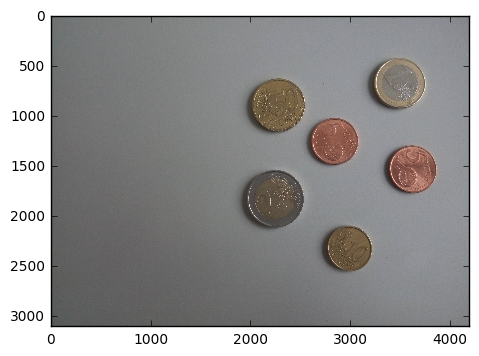

Total number of circles 6
(3104, 4192, 3)


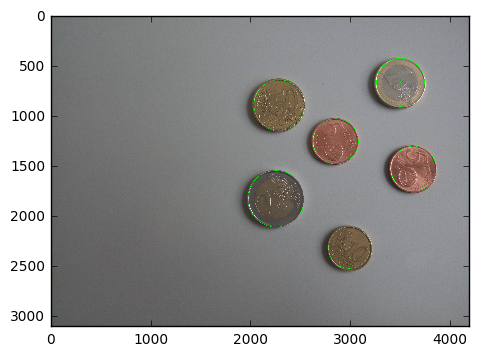

Total number of circles 6
[3496  672  240]
360 984 3184 3808


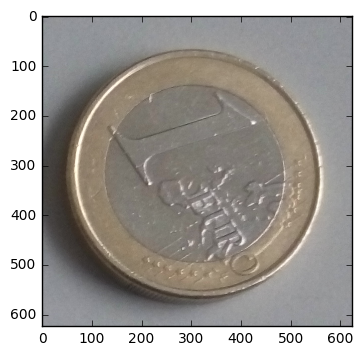

[3628 1534  225]
1242 1826 3336 3920


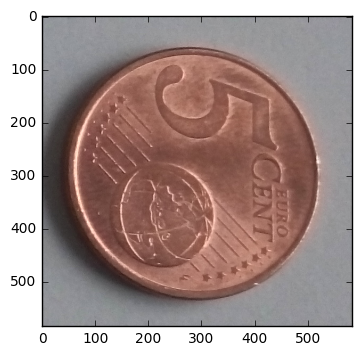

[2850 1260  226]
967 1553 2557 3143


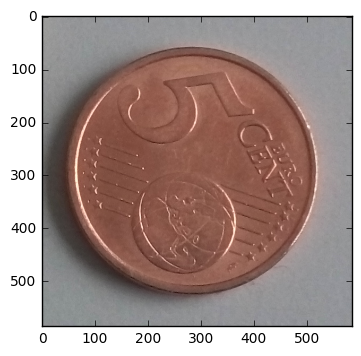

[2250 1834  282]
1468 2200 1884 2616


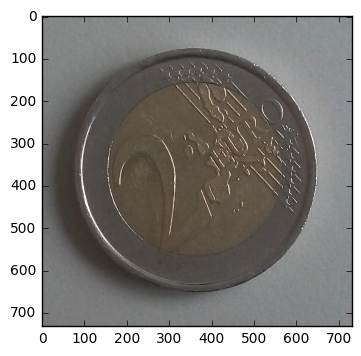

[2984 2322  207]
2053 2591 2715 3253


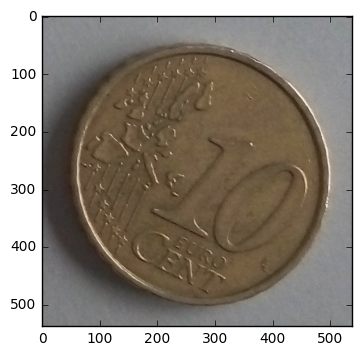

[2282  898  251]
572 1224 1956 2608


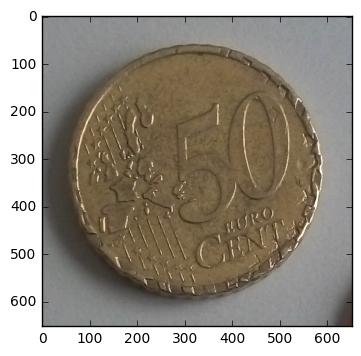

Analyzing input image P70126-141844.jpg
(3104, 4192, 3)


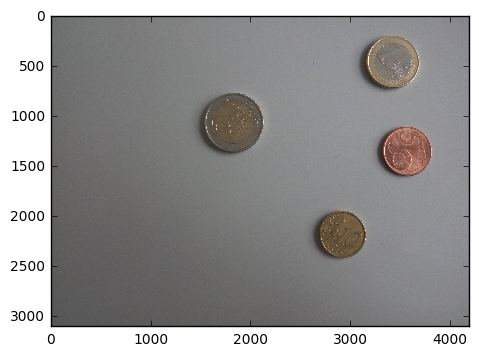

Total number of circles 4
(3104, 4192, 3)


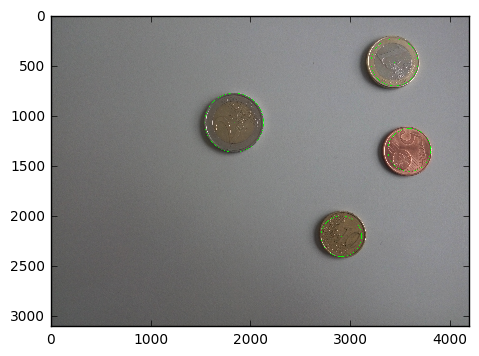

Total number of circles 4
[3436  472  234]
168 776 3132 3740


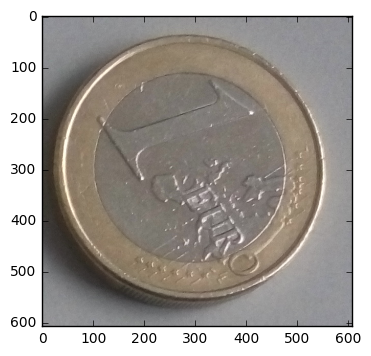

[3584 1346  214]
1068 1624 3306 3862


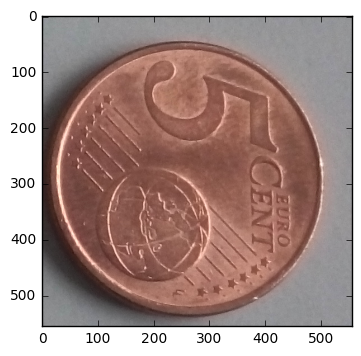

[2904 2208  203]
1945 2471 2641 3167


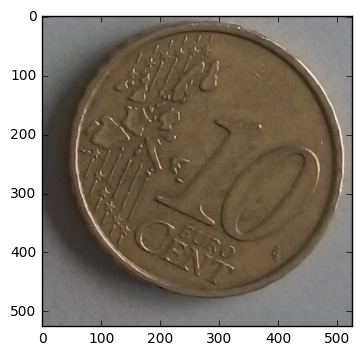

[1832 1074  295]
691 1457 1449 2215


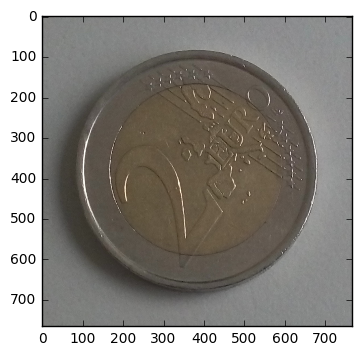

Analyzing input image P70126-141857.jpg
(3104, 4192, 3)


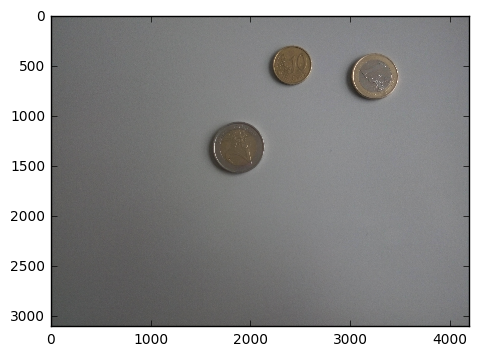

Total number of circles 3
(3104, 4192, 3)


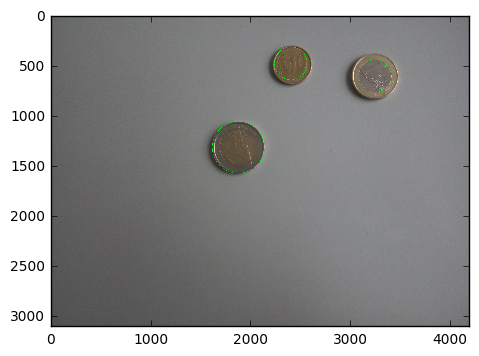

Total number of circles 3
[3242  608  162]
398 818 3032 3452


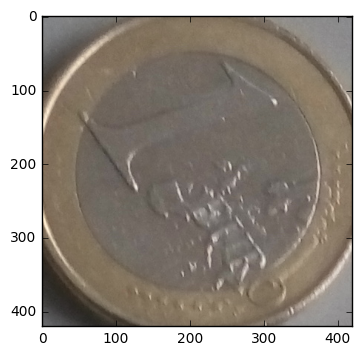

[2398  482  164]
269 695 2185 2611


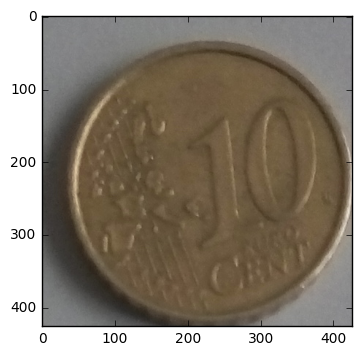

[1872 1320  259]
984 1656 1536 2208


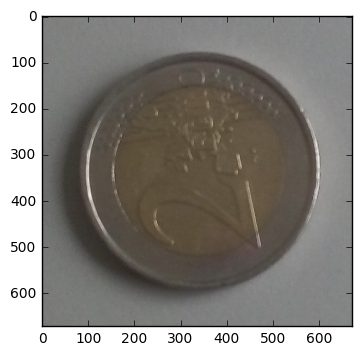

Analyzing input image P70126-141908.jpg
(3104, 4192, 3)


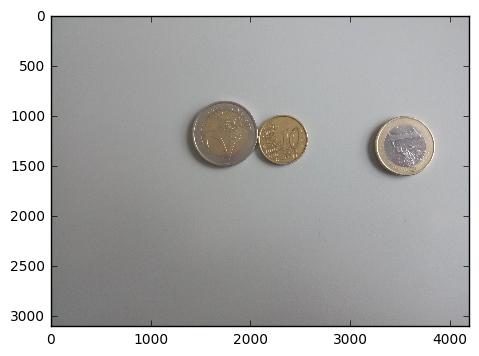

Total number of circles 3
(3104, 4192, 3)


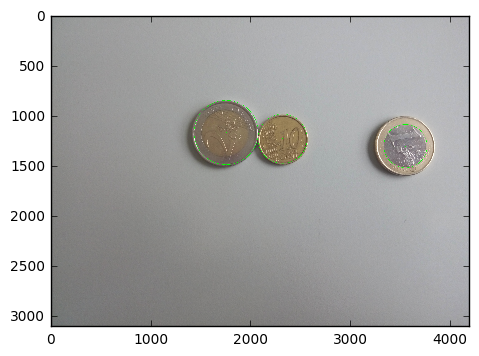

Total number of circles 3
[3546 1308  216]
1028 1588 3266 3826


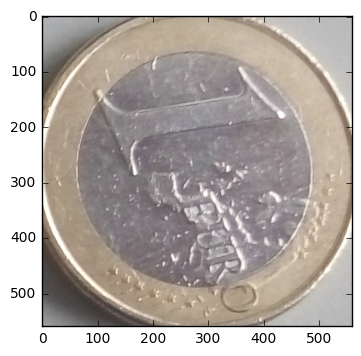

[2316 1234  246]
915 1553 1997 2635


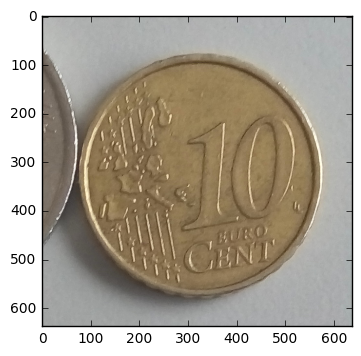

[1752 1172  321]
755 1589 1335 2169


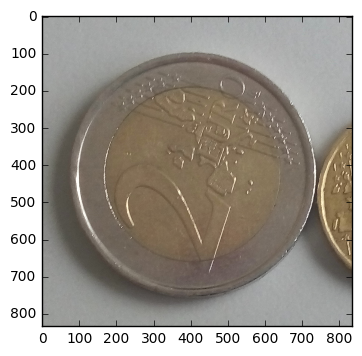

Analyzing input image P70126-141914.jpg
(3104, 4192, 3)


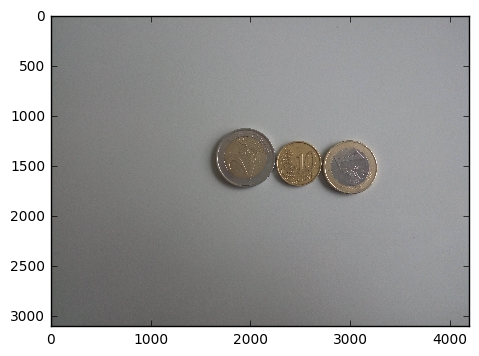

Total number of circles 3
(3104, 4192, 3)


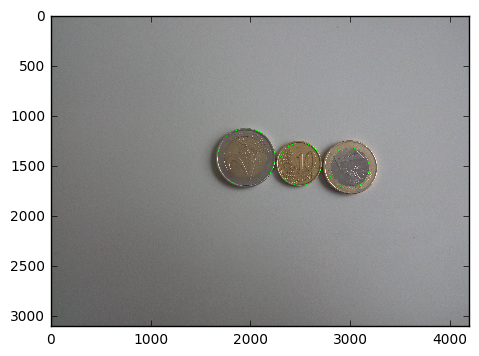

Total number of circles 3
[2980 1526  202]
1264 1788 2718 3242


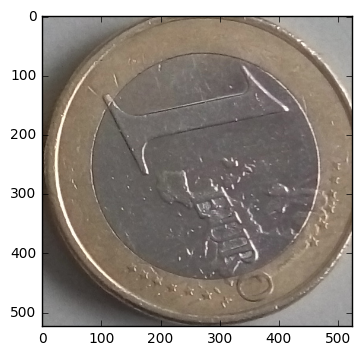

[2494 1488  212]
1213 1763 2219 2769


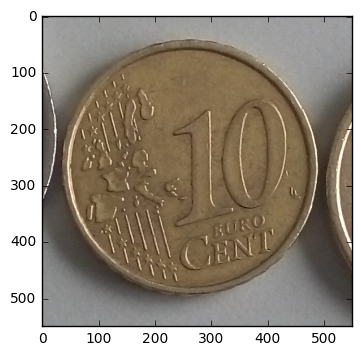

[1954 1420  286]
1049 1791 1583 2325


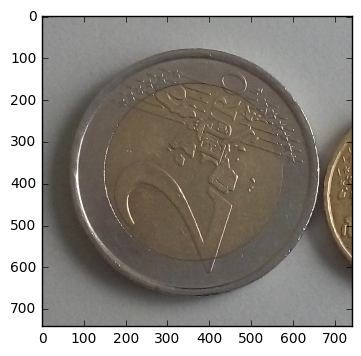

In [13]:
from PIL import Image
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import copy

def showInformation(img):
    print img.shape #dimensions of input image
    plt.imshow(img)
    plt.show()
    
def findCircles(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #plt.imshow(gray, cmap='gray')
    #plt.show()
    circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,0.01,250)
#    circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,0.00001,50,  param1=100, param2=120)

    ncircles = len(circles[0,:])
    param1 = 100
    param2 = 100
    #Decrease the criteria to built a circle (at the risk of getting fakes) when low number of circles found.
    while ncircles in range(0,2) and param2>=80 and param1>=50: 
        param2 = param2 -10
        param1 = param1 -10
        #twice the separation to reduce fakes
        circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,0.01,500, param1=50, param2=param2) 
        ncircles = len(circles[0,:]) 
    circles = np.uint16(np.around(circles))
    print "Total number of circles "+str(len(circles[0,:]))
    return circles

def drawCircles(img,circles):
    cimg=copy.deepcopy(img)
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
        cv2.circle(cimg,(i[0],i[1]),2,(0,255,0),3)
    return cimg

def showCandidates(img,circles):
    candidates = []
    for i in circles[0,:]:
        print i 
        xcenter = i[1]
        ycenter = i[0]
        radius = i[2] 
        radius_ext = int(radius*1.30) # extend the radius by 15% to get border of coin
        xmin = max(0, xcenter-radius_ext)
        xmax = min(img.shape[1], xcenter+radius_ext)
        ymin = max(0, ycenter-radius_ext)
        ymax = min(img.shape[1], ycenter+radius_ext)
        print xmin, xmax, ymin, ymax
        plt.imshow(img[xmin:xmax, ymin:ymax])
        plt.show()
        candidates.append(img[xmin:xmax, ymin:ymax])
    return candidates

#input information to explore
input_file = ["P70126-141835.jpg", "P70126-141844.jpg", "P70126-141857.jpg", "P70126-141908.jpg", "P70126-141914.jpg"]
#input_file = ["P70126-141857.jpg"]
#folder = "background/"
#input_file = [folder+"P70127-121953.jpg"]

for kfile in input_file:
    print "Analyzing input image "+str(kfile)
    im = Image.open(kfile)                                                                              
    imarray = np.array(im)
#    imarray = cv2.resize(imarray, (int(imarray.shape[1]/10),int(imarray.shape[0]/10)), interpolation=cv2.INTER_CUBIC)
    showInformation(imarray)
    showInformation(drawCircles(imarray, findCircles(imarray)))
    candidates = showCandidates(imarray, findCircles(imarray))

# Create agumented (artificial data)

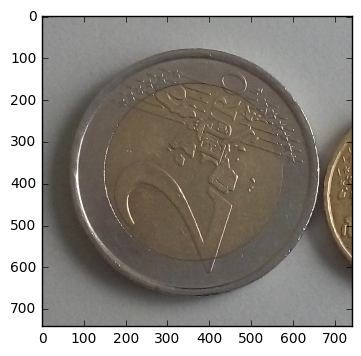

(742, 742, 3)


In [14]:
#Given one coing image, the goal is to create replicas of the same image under different transformations.
test_img= copy.deepcopy(candidates[2])
plt.imshow(test_img)
plt.show()
print test_img.shape

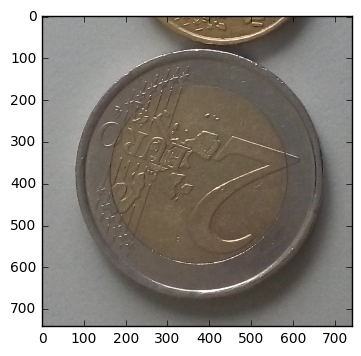

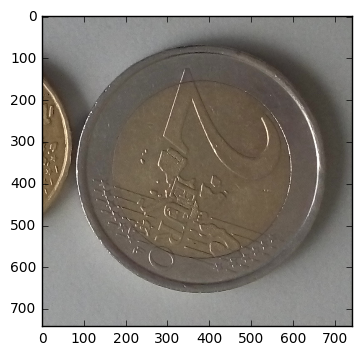

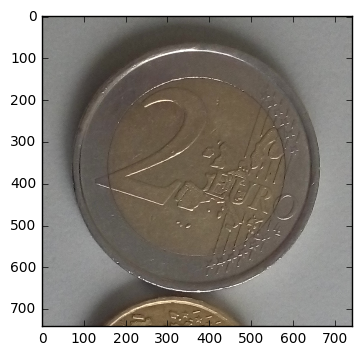

In [15]:
#Rotations
from imutils import rotate
angles = [90,180,270]
for kAngle in angles:
    rotated_image = rotate(test_img, kAngle)   
    plt.imshow(rotated_image)
    plt.show()

# What should be the optimal resolution for training?

(742, 742, 3)


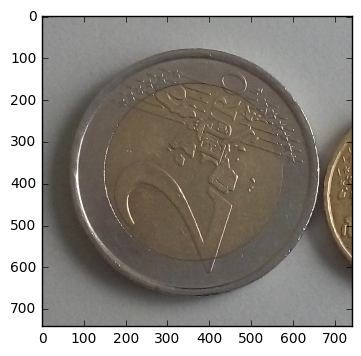

(371, 371, 3)


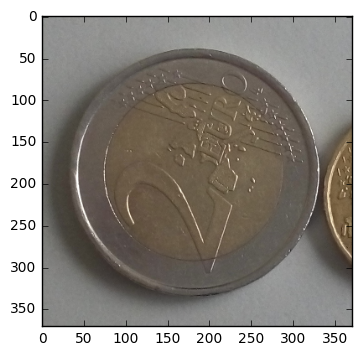

(247, 247, 3)


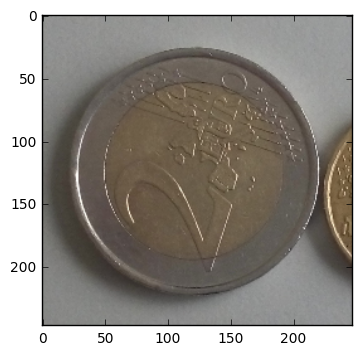

(185, 185, 3)


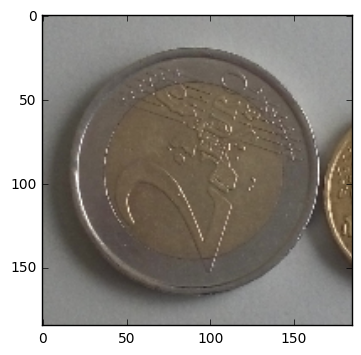

(148, 148, 3)


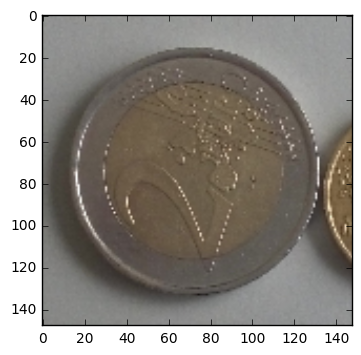

(123, 123, 3)


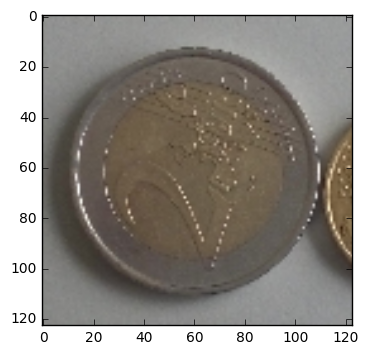

(106, 106, 3)


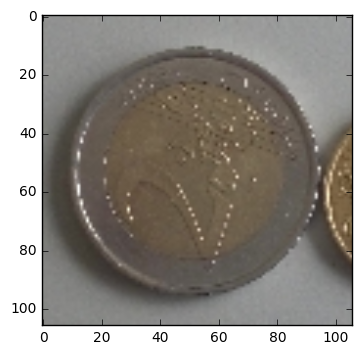

(92, 92, 3)


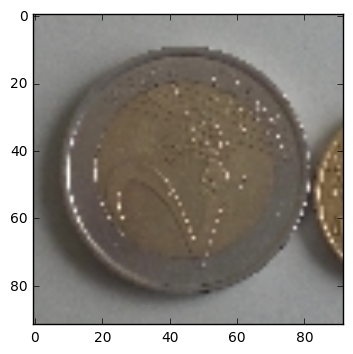

(82, 82, 3)


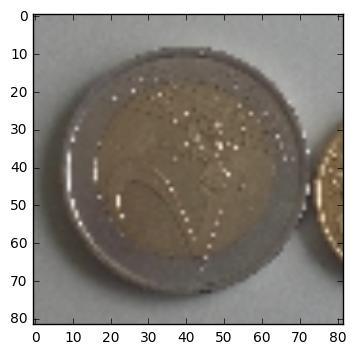

In [16]:
#playing with resolution
for i in range(1,10):
    showInformation(cv2.resize(test_img, (int(test_img.shape[1]/i),int(test_img.shape[0]/i)), interpolation=cv2.INTER_CUBIC))